<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Simple One Hidden Layer Neural Network</h1>


<h2>Objective</h2><ul><li> How to create simple Neural Network in pytorch.</li></ul> 


<h2>Preparation</h2>


In [1]:
import matplotlib.pylab as plt
import numpy as np

import torch
import torch.nn as nn
from torch import sigmoid

torch.manual_seed(0)

In [2]:
# The function for plotting the model

def PlotStuff(X, Y, model, epoch, leg = True):
    
    plt.plot(X.numpy(), model(X).detach().numpy(),
             label = ('epoch ' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    plt.xlabel('x')
    if leg == True:
        plt.legend()
    else:
        pass

<h2 id="Model">Neural Network Module and Training Function</h2> 


Define the activations and the output of the first linear layer as an attribute. Note that this is not good practice. 


In [3]:
# Define the class Net

class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        # hidden layer
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        # Define the first linear layer as an attribute, this is not good practice
        self.a1 = None
        self.l1 = None
        self.l2 = None
    
    # Prediction
    def forward(self, x):
        self.l1 = self.linear1(x)
        self.a1 = sigmoid(self.l1)
        self.l2 = self.linear2(self.a1)
        yhat = sigmoid(self.linear2(self.a1))
        return yhat

In [4]:
# Define the training function

def train(Y, X, model, optimizer, criterion, epochs = 1000):
    cost = []
    total = 0
    for epoch in range(epochs):
        total = 0
        for y, x in zip(Y, X):
            yhat = model(x)
            loss = criterion(yhat, y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
            #cumulative loss 
            total+=loss.item() 
        cost.append(total)
        if epoch % 250 == 0:
            PlotStuff(X, Y, model, epoch, leg = True)
            plt.show()
            model(X)
            plt.scatter(model.a1.detach().numpy()[:, 0],
                        model.a1.detach().numpy()[:, 1],
                        c = Y.numpy().reshape(-1))
            plt.title('Activations')
            plt.show()
    return cost

<h2 id="Makeup_Data">Make Some Data</h2>


In [5]:
# Make some data

X = torch.arange(-20, 20, 1).view(-1, 1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:, 0] > -4) & (X[:, 0] < 4)] = 1.0

<h2 id="Train">Define the Neural Network, Criterion Function, Optimizer and Train the Model</h2>


In [6]:
# Create the Cross-Entropy loss function

def criterion_cross(outputs, labels):
    out = -1 * torch.mean(labels * torch.log(outputs) + (1 - labels) * torch.log(1 - outputs))
    return out

Define the Neural Network, Optimizer, and Train the Model:


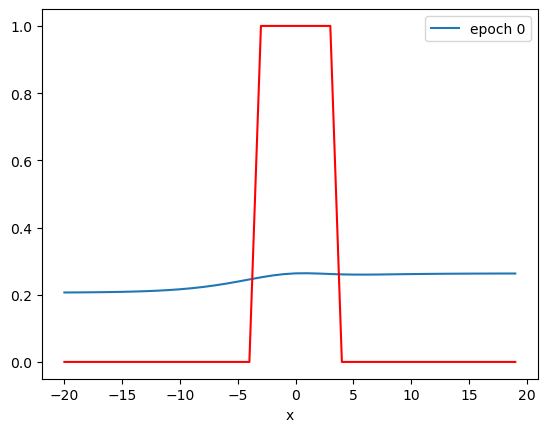

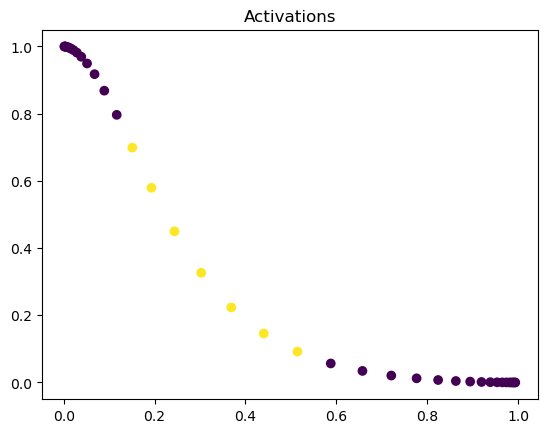

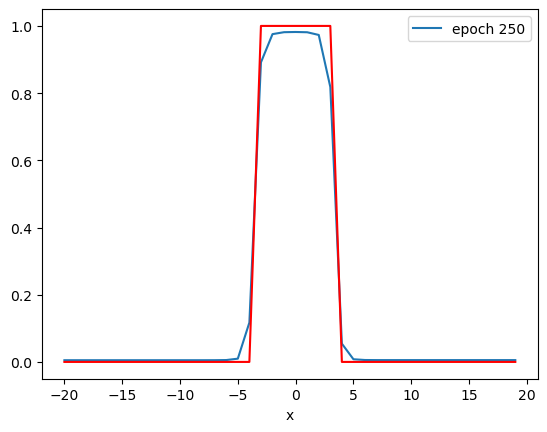

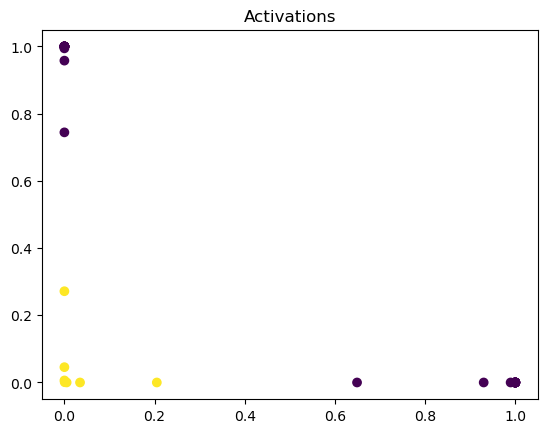

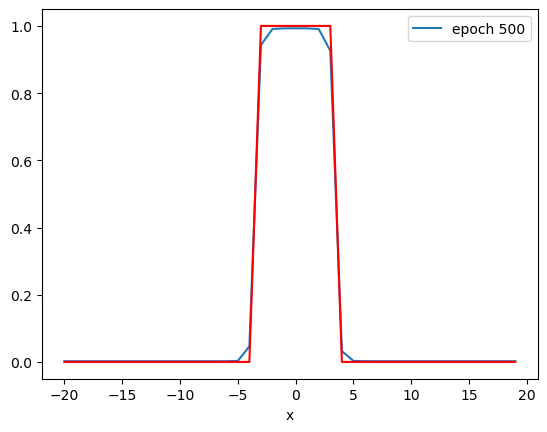

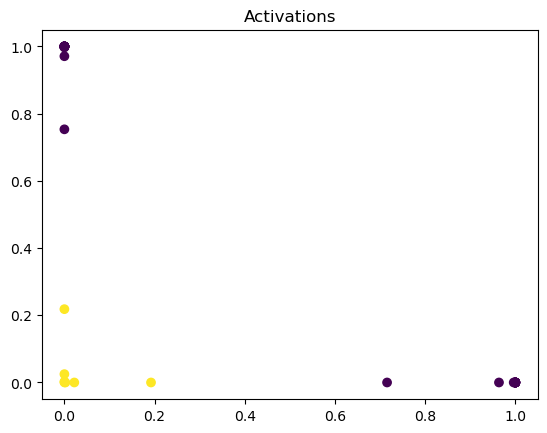

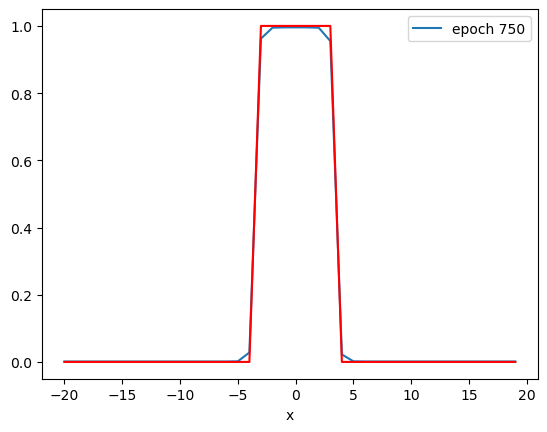

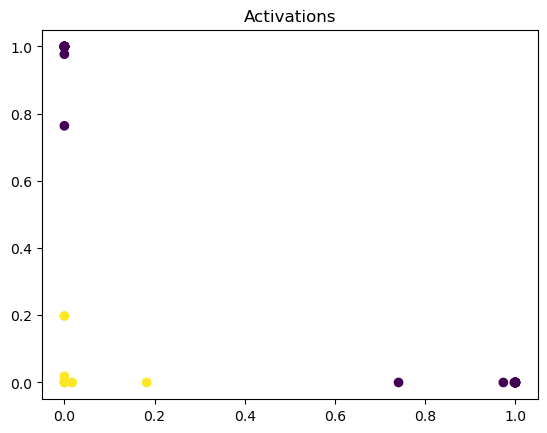

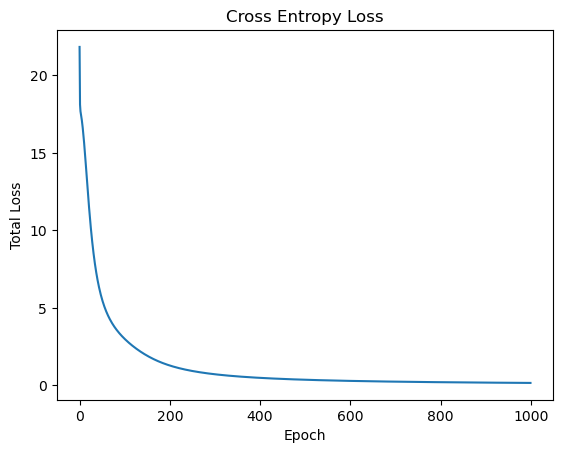

In [7]:
D_in = 1  # size of input
H = 2  # size of hidden layer
D_out = 1  # number of outputs

# Learning rate
learning_rate = 0.1

# Create the model
model = Net(D_in, H, D_out)

# Create optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# Train the model
cost_cross = train(Y, X, model, optimizer, criterion_cross, epochs = 1000)

# Plot loss
plt.plot(cost_cross)
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.title('Cross Entropy Loss')
plt.show()

By examining the output of the  activation, you see by the 500th epoch that the data has been mapped to a linearly separable space.

In [8]:
# Prediction for arbitrary tensors
x = torch.tensor([0.0])
yhat = model(x)
yhat

tensor([0.9969], grad_fn=<SigmoidBackward0>)

In [9]:
X_ = torch.tensor([[0.0],[2.0],[3.0]])
Yhat = model(X_)
Yhat

tensor([[0.9969],
        [0.9963],
        [0.9680]], grad_fn=<SigmoidBackward0>)

In [10]:
# Putting threshold on the prediction
Yhat = Yhat > 0.5
Yhat

tensor([[True],
        [True],
        [True]])

<h3>Practice</h3>


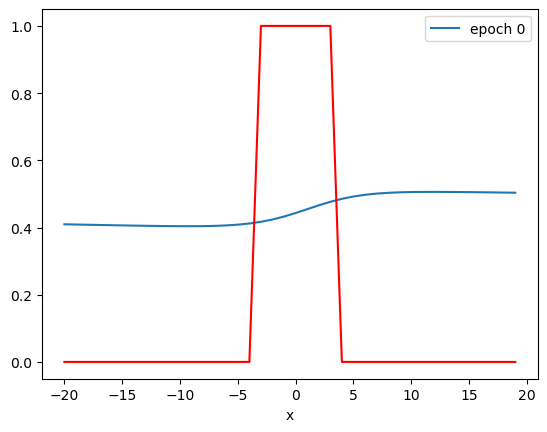

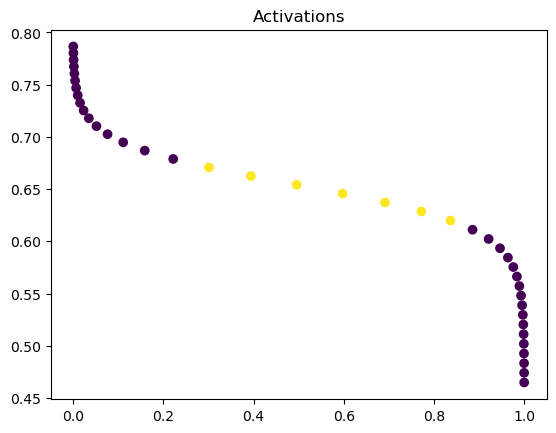

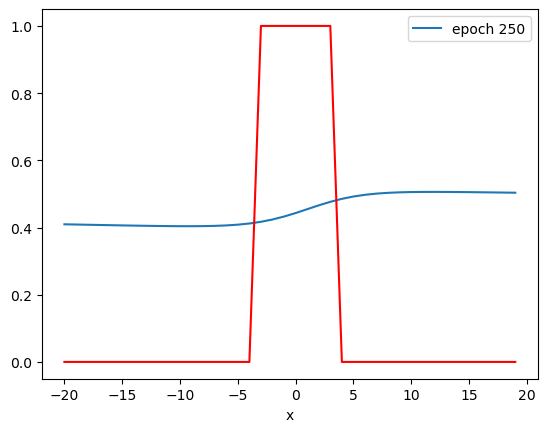

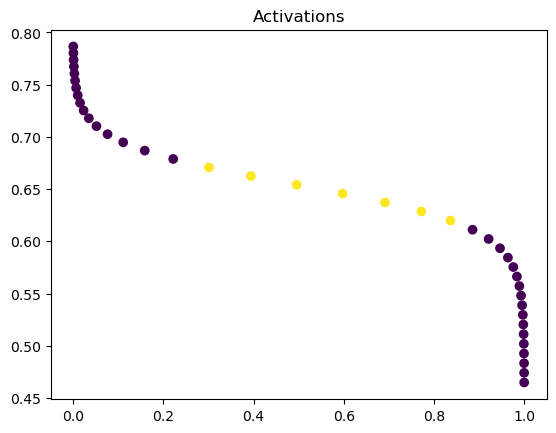

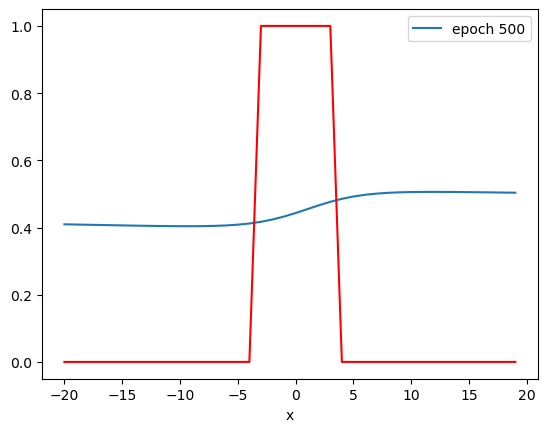

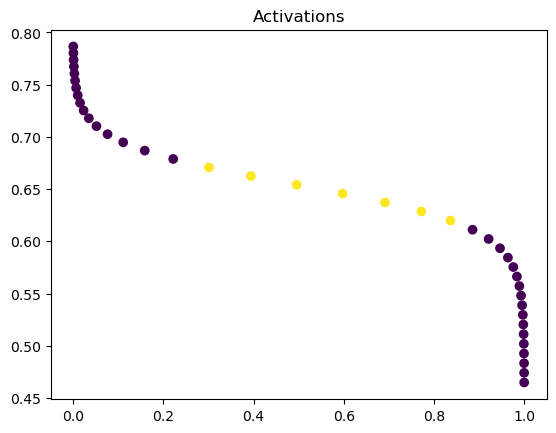

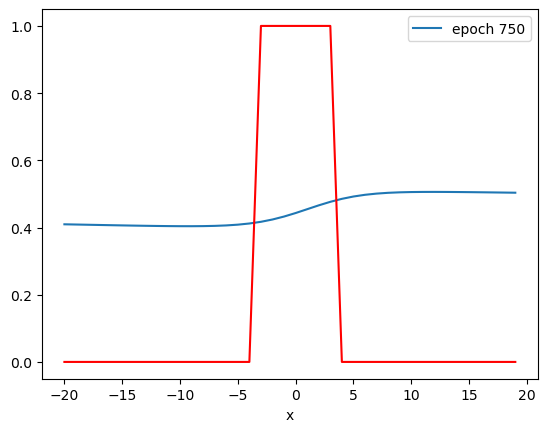

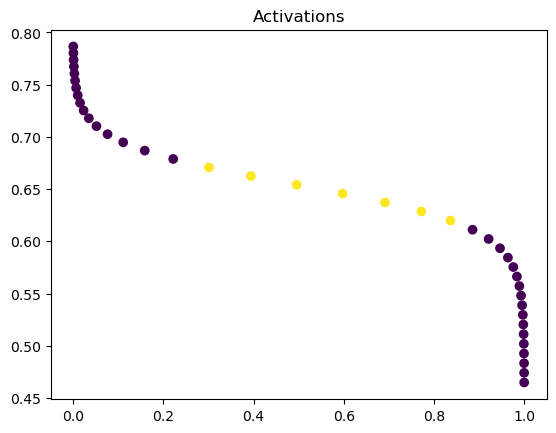

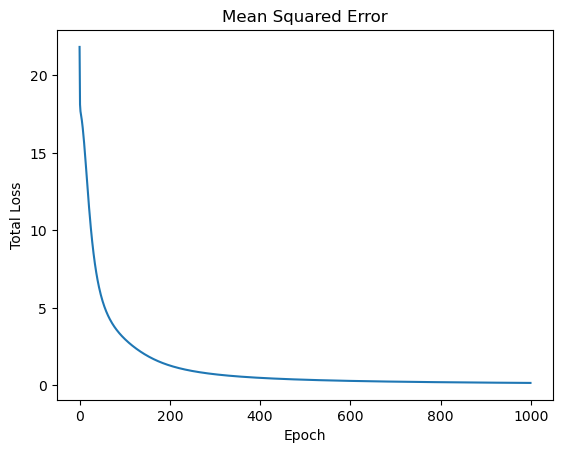

In [12]:
# Practice: Train the model with MSE Loss Function

criterion_mse = nn.MSELoss()

D_in = 1  # size of input
H = 2  # size of hidden layer
D_out = 1  # number of outputs

# Learning rate
learning_rate = 0.1

# Create the model
model_practice = Net(D_in, H, D_out)

# Create optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# Train the model
cost_mse = train(Y, X, model_practice, optimizer, criterion_mse, epochs = 1000)

# Plot loss
plt.plot(cost_cross)
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.title('Mean Squared Error')
plt.show()